In [44]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import defaultdict
from brokenaxes import brokenaxes

def _aggregate(runs):
    agg = defaultdict(lambda: {"time_list": [], "found_list": []})
    for r in runs:
        key = (r["solver"], r["blocksize"])
        agg[key]["time_list"].append(r["time"])
        agg[key]["found_list"].append(r["found"])
    return agg

def plot_time_boxplot_broken(runs, blocks=(16, 32, 64), solvers=None, 
                            save_path=None, dpi=300, format='png'):
    
    agg = _aggregate(runs)

    if solvers is None:
        solvers = sorted({r["solver"] for r in runs})
    else:
        solvers = [s for s in solvers if any(r["solver"] == s for r in runs)]

    ylims_config = {
        16: {
            'ylims': ((0.033, 0.047), (0.505, 0.565), (2.85, 7.0)),
            'height_ratios': [1.2, 1.2, 1.8]
        },
        32: {
            'ylims': ((4.2, 5.6), (45.5, 48.0)),
            'height_ratios': [1, 2]
        },
        64: {
            'ylims': ((6.0, 9.0), (58.5, 60.5), (1407, 1425)),
            'height_ratios': [1, 1, 2]
        }
    }

    n_blocks = len(blocks)
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
    
    fig = plt.figure(figsize=(n_blocks * 4.5, 6.5))
    
    for i, b in enumerate(blocks):
        data = [agg.get((s, b), {}).get("time_list", []) for s in solvers]
        found_lists = [agg.get((s, b), {}).get("found_list", []) for s in solvers]
        
        success_rates = [(sum(f) / len(f) * 100) if len(f) > 0 else 0 
                        for f in found_lists]

        valid_data = [d for d in data if len(d) > 0]
        if not valid_data:
            ax = plt.subplot(1, n_blocks, i + 1)
            ax.set_title(f"GIFT-{b} (no data)", fontsize=12, pad=10)
            ax.axis("off")
            continue

        config = ylims_config.get(b)
        positions = np.arange(1, len(solvers) + 1)
        
        if config is not None:
            bax = brokenaxes(
                ylims=config['ylims'],
                height_ratios=config['height_ratios'],
                hspace=0.10,
                wspace=0.15,
                subplot_spec=plt.GridSpec(1, n_blocks, figure=fig, wspace=0.3)[0, i],
                despine=False
            )
            
            bp = bax.boxplot(data, positions=positions, 
                           showfliers=False, widths=0.6, patch_artist=True)
            
            for ax_obj in bax.axs:
                boxes = [child for child in ax_obj.get_children() 
                        if isinstance(child, plt.matplotlib.patches.PathPatch)]
                for idx, box in enumerate(boxes):
                    if idx < len(colors):
                        box.set_facecolor(colors[idx])
                        box.set_alpha(0.7)

            bax.set_title(f"GIFT-{b}", fontsize=12, pad=10)
            if i == 0:
                bax.set_ylabel("Wall-clock time (s)", fontsize=10)
            
            for ax_obj in bax.axs:
                ax_obj.set_xticks(positions)
                ax_obj.set_xticklabels(solvers, rotation=45, ha='right', fontsize=9)
                ax_obj.yaxis.set_major_locator(MaxNLocator(nbins=4))

            for j, rate in enumerate(success_rates):
                if data[j]:
                    q3 = np.percentile(data[j], 75)
                    
                    for ax_obj in bax.axs:
                        ylim = ax_obj.get_ylim()
                        if ylim[0] <= q3 <= ylim[1]:
                            y_range = ylim[1] - ylim[0]
                            offset = y_range * 0.03
                            text_y = q3 + offset
                            text_y = min(text_y, ylim[1] - y_range * 0.08)
                            
                            ax_obj.text(j + 1, text_y, f"{rate:.0f}%", 
                                      ha="center", va="bottom", fontsize=9, 
                                      color="blue", weight='bold',
                                      clip_on=True)
                            break

    if save_path is not None:
        plt.savefig(save_path, dpi=dpi, format=format, bbox_inches='tight')
        print(f"Figure saved to: {save_path} (dpi={dpi}, format={format})")
    
    plt.show()

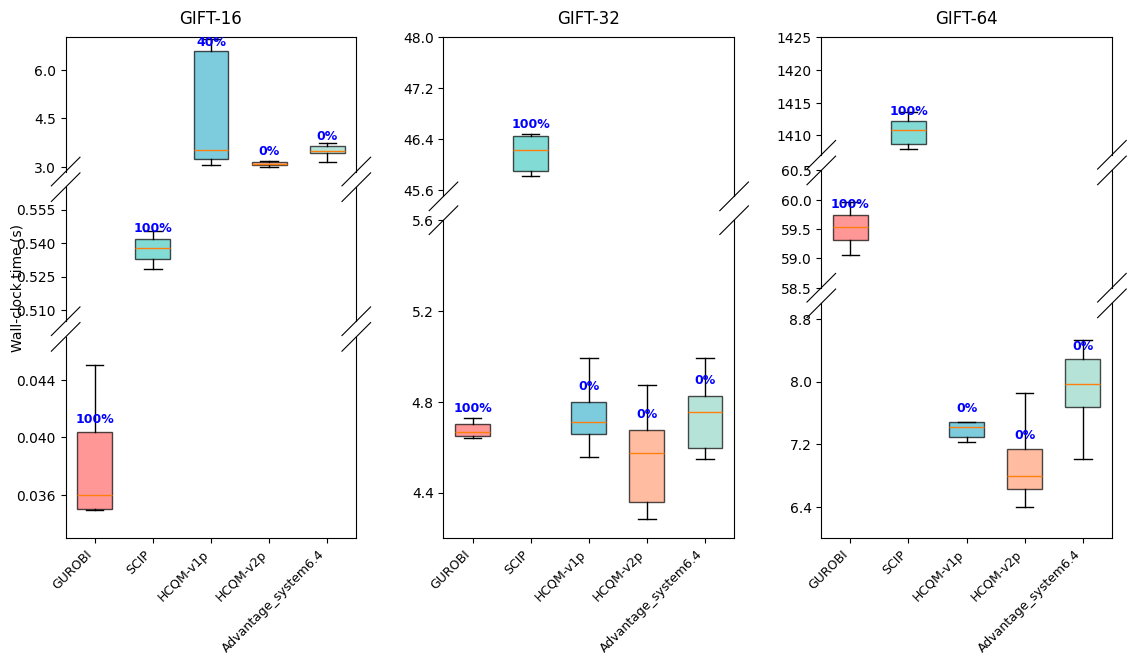

Figure saved to: solver_comparison2.pdf (dpi=300, format=pdf)


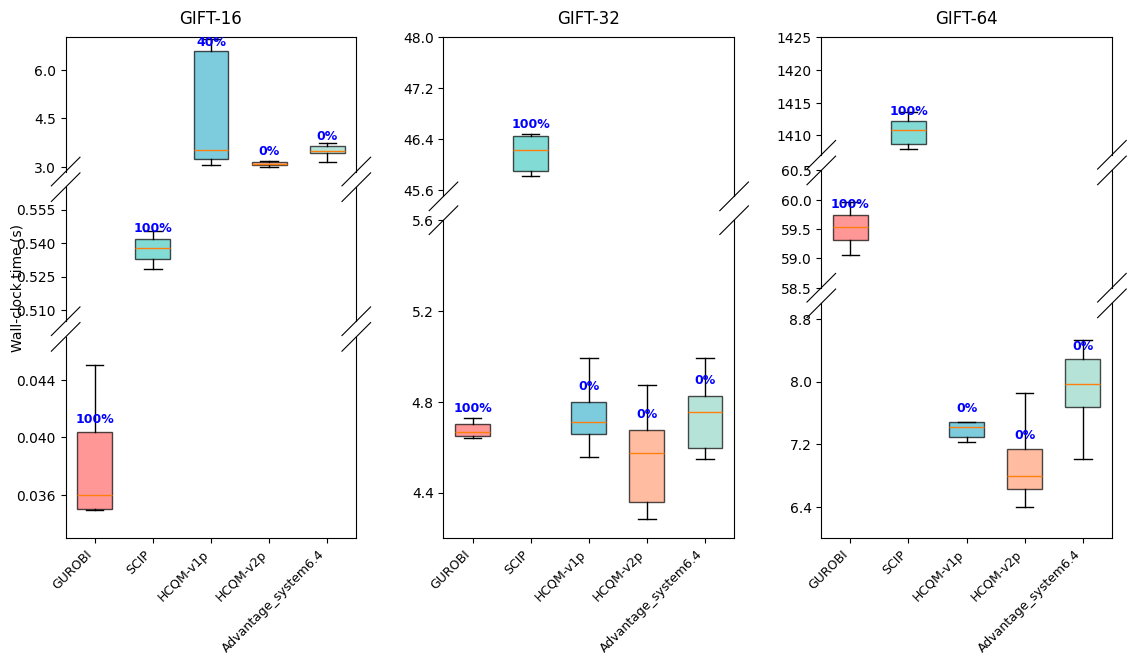

In [45]:
# 실행 예시
runs = [
    {"solver":"GUROBI","blocksize":16,"found":True,"time":0.044274330139160156},
    {"solver":"GUROBI","blocksize":16,"found":True,"time":0.04506373405456543},
    {"solver":"GUROBI","blocksize":16,"found":True,"time":0.03600049018859863},
    {"solver":"GUROBI","blocksize":16,"found":True,"time":0.03765463829040527},
    {"solver":"GUROBI","blocksize":16,"found":True,"time":0.03500008583068848},
    {"solver":"GUROBI","blocksize":16,"found":True,"time":0.04131817817687988},
    {"solver":"GUROBI","blocksize":16,"found":True,"time":0.03600001335144043},
    {"solver":"GUROBI","blocksize":16,"found":True,"time":0.03497028350830078},
    {"solver":"GUROBI","blocksize":16,"found":True,"time":0.03510856628417969},
    {"solver":"GUROBI","blocksize":16,"found":True,"time":0.03503108024597168},

    {"solver":"GUROBI","blocksize":32,"found":True,"time":4.726790428161621},
    {"solver":"GUROBI","blocksize":32,"found":True,"time":4.570987939834595},
    {"solver":"GUROBI","blocksize":32,"found":True,"time":4.666810035705566},
    {"solver":"GUROBI","blocksize":32,"found":True,"time":4.7060558795928955},
    {"solver":"GUROBI","blocksize":32,"found":True,"time":4.650613069534302},
    {"solver":"GUROBI","blocksize":32,"found":True,"time":4.652578115463257},
    {"solver":"GUROBI","blocksize":32,"found":True,"time":4.665936708450317},
    {"solver":"GUROBI","blocksize":32,"found":True,"time":4.698387384414673},
    {"solver":"GUROBI","blocksize":32,"found":True,"time":4.638615131378174},
    {"solver":"GUROBI","blocksize":32,"found":True,"time":4.7008068561553955},

    {"solver":"GUROBI","blocksize":64,"found":True,"time":59.28814387321472},
    {"solver":"GUROBI","blocksize":64,"found":True,"time":59.71915578842163},
    {"solver":"GUROBI","blocksize":64,"found":True,"time":59.277061462402344},
    {"solver":"GUROBI","blocksize":64,"found":True,"time":59.64447641372681},
    {"solver":"GUROBI","blocksize":64,"found":True,"time":59.75775766372681},
    {"solver":"GUROBI","blocksize":64,"found":True,"time":59.95933747291565},
    {"solver":"GUROBI","blocksize":64,"found":True,"time":59.43941831588745},
    {"solver":"GUROBI","blocksize":64,"found":True,"time":59.060269355773926},
    {"solver":"GUROBI","blocksize":64,"found":True,"time":59.80805253982544},
    {"solver":"GUROBI","blocksize":64,"found":True,"time":59.377745389938354},
    
    {"solver":"HCQM-v1p","blocksize":16,"found":True,"time":6.569568395614624},
    {"solver":"HCQM-v1p","blocksize":16,"found":False,"time":3.493520975112915},
    {"solver":"HCQM-v1p","blocksize":16,"found":True,"time":6.559729814529419},
    {"solver":"HCQM-v1p","blocksize":16,"found":False,"time":3.2298765182495117},
    {"solver":"HCQM-v1p","blocksize":16,"found":False,"time":3.2943687438964844},
    {"solver":"HCQM-v1p","blocksize":16,"found":False,"time":3.1739847660064697},
    {"solver":"HCQM-v1p","blocksize":16,"found":False,"time":3.0505993366241455},
    {"solver":"HCQM-v1p","blocksize":16,"found":True,"time":6.787240743637085},
    {"solver":"HCQM-v1p","blocksize":16,"found":False,"time":3.550814151763916},
    {"solver":"HCQM-v1p","blocksize":16,"found":True,"time":6.955843210220337},

    {"solver":"HCQM-v1p","blocksize":32,"found":False,"time":4.777954816818237},
    {"solver":"HCQM-v1p","blocksize":32,"found":False,"time":4.650807619094849},
    {"solver":"HCQM-v1p","blocksize":32,"found":False,"time":5.093790531158447},
    {"solver":"HCQM-v1p","blocksize":32,"found":False,"time":4.993261814117432},
    {"solver":"HCQM-v1p","blocksize":32,"found":False,"time":4.695991516113281},
    {"solver":"HCQM-v1p","blocksize":32,"found":False,"time":4.683141469955444},
    {"solver":"HCQM-v1p","blocksize":32,"found":False,"time":4.804176568984985},
    {"solver":"HCQM-v1p","blocksize":32,"found":False,"time":4.580393552780151},
    {"solver":"HCQM-v1p","blocksize":32,"found":False,"time":4.5564374923706055},
    {"solver":"HCQM-v1p","blocksize":32,"found":False,"time":4.72429347038269},
    
    {"solver":"HCQM-v1p","blocksize":64,"found":False,"time":7.225220203399658},
    {"solver":"HCQM-v1p","blocksize":64,"found":False,"time":7.288676023483276},
    {"solver":"HCQM-v1p","blocksize":64,"found":False,"time":7.4847729206085205},
    {"solver":"HCQM-v1p","blocksize":64,"found":False,"time":7.362738609313965},
    {"solver":"HCQM-v1p","blocksize":64,"found":False,"time":7.307877540588379},
    {"solver":"HCQM-v1p","blocksize":64,"found":False,"time":8.188289165496826},
    {"solver":"HCQM-v1p","blocksize":64,"found":False,"time":7.260179281234741},
    {"solver":"HCQM-v1p","blocksize":64,"found":False,"time":7.475294589996338},
    {"solver":"HCQM-v1p","blocksize":64,"found":False,"time":8.028724908828735},
    {"solver":"HCQM-v1p","blocksize":64,"found":False,"time":7.485617637634277},
    
    {"solver":"HCQM-v2p","blocksize":16,"found":False,"time":3.817202091217041},
    {"solver":"HCQM-v2p","blocksize":16,"found":False,"time":3.044832229614258},
    {"solver":"HCQM-v2p","blocksize":16,"found":False,"time":3.1795437335968018},
    {"solver":"HCQM-v2p","blocksize":16,"found":False,"time":3.0992307662963867},
    {"solver":"HCQM-v2p","blocksize":16,"found":False,"time":2.877112627029419},
    {"solver":"HCQM-v2p","blocksize":16,"found":False,"time":3.0605556964874268},
    {"solver":"HCQM-v2p","blocksize":16,"found":False,"time":3.0020992755889893},
    {"solver":"HCQM-v2p","blocksize":16,"found":False,"time":3.0694174766540527},
    {"solver":"HCQM-v2p","blocksize":16,"found":False,"time":3.0673251152038574},
    {"solver":"HCQM-v2p","blocksize":16,"found":False,"time":3.186079502105713},
    
    {"solver":"HCQM-v2p","blocksize":32,"found":False,"time":4.5692832469940186},
    {"solver":"HCQM-v2p","blocksize":32,"found":False,"time":4.430309057235718},
    {"solver":"HCQM-v2p","blocksize":32,"found":False,"time":4.680055618286133},
    {"solver":"HCQM-v2p","blocksize":32,"found":False,"time":4.2856972217559814},
    {"solver":"HCQM-v2p","blocksize":32,"found":False,"time":4.31427526473999},
    {"solver":"HCQM-v2p","blocksize":32,"found":False,"time":4.334402561187744},
    {"solver":"HCQM-v2p","blocksize":32,"found":False,"time":4.8718485832214355},
    {"solver":"HCQM-v2p","blocksize":32,"found":False,"time":4.576392412185669},
    {"solver":"HCQM-v2p","blocksize":32,"found":False,"time":4.732695817947388},
    {"solver":"HCQM-v2p","blocksize":32,"found":False,"time":4.661434650421143},
    
    
    {"solver":"HCQM-v2p","blocksize":64,"found":False,"time":6.759298324584961},
    {"solver":"HCQM-v2p","blocksize":64,"found":False,"time":6.829053163528442},
    {"solver":"HCQM-v2p","blocksize":64,"found":False,"time":7.858115196228027},
    {"solver":"HCQM-v2p","blocksize":64,"found":False,"time":7.853144645690918},
    {"solver":"HCQM-v2p","blocksize":64,"found":False,"time":6.54868483543396},
    {"solver":"HCQM-v2p","blocksize":64,"found":False,"time":6.972450017929077},
    {"solver":"HCQM-v2p","blocksize":64,"found":False,"time":6.397719144821167},
    {"solver":"HCQM-v2p","blocksize":64,"found":False,"time":6.6225175857543945},
    {"solver":"HCQM-v2p","blocksize":64,"found":False,"time":7.1999735832214355},
    {"solver":"HCQM-v2p","blocksize":64,"found":False,"time":6.640721082687378},

{"solver":"Advantage_system6.4","blocksize":16,"found":False,"time":6.257400989532471},
{"solver":"Advantage_system6.4","blocksize":16,"found":False,"time":3.592562198638916},
{"solver":"Advantage_system6.4","blocksize":16,"found":False,"time":3.1358680725097656},
{"solver":"Advantage_system6.4","blocksize":16,"found":False,"time":3.4953434467315674},
{"solver":"Advantage_system6.4","blocksize":16,"found":False,"time":3.4135076999664307},
{"solver":"Advantage_system6.4","blocksize":16,"found":False,"time":3.6488683223724365},
{"solver":"Advantage_system6.4","blocksize":16,"found":False,"time":3.4092984199523926},
{"solver":"Advantage_system6.4","blocksize":16,"found":False,"time":3.732712745666504},
{"solver":"Advantage_system6.4","blocksize":16,"found":False,"time":3.476032018661499},
{"solver":"Advantage_system6.4","blocksize":16,"found":False,"time":3.4436721801757812},

{"solver":"Advantage_system6.4","blocksize":32,"found":False,"time":4.551569938659668},
{"solver":"Advantage_system6.4","blocksize":32,"found":False,"time":4.80743145942688},
{"solver":"Advantage_system6.4","blocksize":32,"found":False,"time":4.828798770904541},
{"solver":"Advantage_system6.4","blocksize":32,"found":False,"time":5.547798156738281},
{"solver":"Advantage_system6.4","blocksize":32,"found":False,"time":4.622176885604858},
{"solver":"Advantage_system6.4","blocksize":32,"found":False,"time":4.546480178833008},
{"solver":"Advantage_system6.4","blocksize":32,"found":False,"time":4.589252948760986},
{"solver":"Advantage_system6.4","blocksize":32,"found":False,"time":4.712533712387085},
{"solver":"Advantage_system6.4","blocksize":32,"found":False,"time":4.993773698806763},
{"solver":"Advantage_system6.4","blocksize":32,"found":False,"time":4.795717239379883},
       
    
    
    {"solver":"Advantage_system6.4","blocksize":64,"found":False,"time":8.525911569595337},
    {"solver":"Advantage_system6.4","blocksize":64,"found":False,"time":7.24316153579052},
    {"solver":"Advantage_system6.4","blocksize":64,"found":False,"time":8.178342449437061},
    {"solver":"Advantage_system6.4","blocksize":64,"found":False,"time":7.675700151302547},
    {"solver":"Advantage_system6.4","blocksize":64,"found":False,"time":8.321266164826304},
    {"solver":"Advantage_system6.4","blocksize":64,"found":False,"time":7.91009427479729},
    {"solver":"Advantage_system6.4","blocksize":64,"found":False,"time":7.693035935190076},
    {"solver":"Advantage_system6.4","blocksize":64,"found":False,"time":7.01490997347638},
    {"solver":"Advantage_system6.4","blocksize":64,"found":False,"time":8.407024274404334},
    {"solver":"Advantage_system6.4","blocksize":64,"found":False,"time":8.024105965106625},
 
    
{"solver":"SCIP","blocksize":16,"found":True,"time":0.558617353439331},
{"solver":"SCIP","blocksize":16,"found":True,"time":0.5283493995666504},
{"solver":"SCIP","blocksize":16,"found":True,"time":0.5429763793945312},
{"solver":"SCIP","blocksize":16,"found":True,"time":0.5385622978210449},
{"solver":"SCIP","blocksize":16,"found":True,"time":0.5317873954772949},
{"solver":"SCIP","blocksize":16,"found":True,"time":0.5353622436523438},
{"solver":"SCIP","blocksize":16,"found":True,"time":0.5452091693878174},
{"solver":"SCIP","blocksize":16,"found":True,"time":0.5112552642822266},
{"solver":"SCIP","blocksize":16,"found":True,"time":0.5385537147521973},
{"solver":"SCIP","blocksize":16,"found":True,"time":0.5373201370239258},

    
    
{"solver":"SCIP","blocksize":32,"found":True,"time":46.483410358428955},
{"solver":"SCIP","blocksize":32,"found":True,"time":46.185460329055786},
{"solver":"SCIP","blocksize":32,"found":True,"time":45.82176399230957},
{"solver":"SCIP","blocksize":32,"found":True,"time":45.92363095283508},
{"solver":"SCIP","blocksize":32,"found":True,"time":45.89724946022034},
{"solver":"SCIP","blocksize":32,"found":True,"time":45.865671157836914},
{"solver":"SCIP","blocksize":32,"found":True,"time":46.28884935379028},
{"solver":"SCIP","blocksize":32,"found":True,"time":47.630722761154175},
{"solver":"SCIP","blocksize":32,"found":True,"time":47.795103788375854},
{"solver":"SCIP","blocksize":32,"found":True,"time":46.37323331832886},

    
    
    {"solver":"SCIP","blocksize":64,"found":True,"time":1424.2357320785522},
    {"solver":"SCIP","blocksize":64,"found":True,"time":1412.657146692276},
    {"solver":"SCIP","blocksize":64,"found":True,"time":1407.8776772022247},
    {"solver":"SCIP","blocksize":64,"found":True,"time":1410.9264085292816},
    {"solver":"SCIP","blocksize":64,"found":True,"time":1413.6161477565765},
    {"solver":"SCIP","blocksize":64,"found":True,"time":1408.1389062404633},
    {"solver":"SCIP","blocksize":64,"found":True,"time":1410.7813720703125},
    {"solver":"SCIP","blocksize":64,"found":True,"time":1408.6642806529999},
    {"solver":"SCIP","blocksize":64,"found":True,"time":1410.7353439331055},
    {"solver":"SCIP","blocksize":64,"found":True,"time":1408.8815047740936},

]

blocks = (16, 32, 64)
solvers = ["GUROBI", "SCIP", "HCQM-v1p", "HCQM-v2p", "Advantage_system6.4"]

plot_time_boxplot_broken(runs, blocks=(16, 32, 64), solvers=solvers)


plot_time_boxplot_broken(runs, blocks=(16, 32, 64), solvers=solvers,
                         save_path='solver_comparison2.pdf', format='pdf')
